In [8]:


import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
full_file_path = "input/fetal_health.csv"


In [9]:
print(full_file_path)
dataset = pd.read_csv(full_file_path)
dataset.head()

input/fetal_health.csv


,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [10]:
features = dataset.iloc[:, :-1]
labels = dataset.iloc[:, -1:]
xtrain, xtest, ytrain, ytest = train_test_split(features, labels, test_size = .25,random_state = 42)

In [11]:
clf_svm = svm.SVC(kernel = "poly")
clf_forest = RandomForestClassifier(max_depth=13, random_state=0)
ytrain = ytrain.values.reshape(-1)
clf_svm.fit(xtrain,ytrain)
clf_forest.fit(xtrain,ytrain)

RandomForestClassifier(max_depth=13, random_state=0)

In [12]:
ypred_svm = clf_svm.predict(xtest)
ypred_forest = clf_forest.predict(xtest)
model_accuracy = [0,0]
model_accuracy[0] = accuracy_score(ypred_svm,ytest)
model_accuracy[1] = accuracy_score(ypred_forest,ytest)

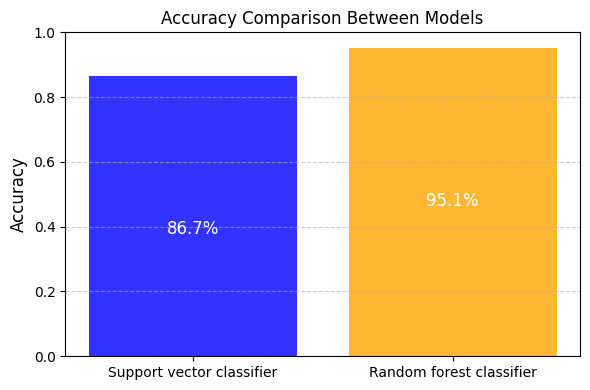

In [13]:

model_names = ['Support vector classifier', 'Random forest classifier']
plt.figure(figsize=(6, 4))
bars = plt.bar(model_names, model_accuracy, color=['blue', 'orange'], alpha=0.8)


for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 0.5,
             f'{bar.get_height() * 100:.1f}%', ha='center', va='bottom', fontsize=12, color='white')

plt.ylabel('Accuracy', fontsize=12)
plt.title('Accuracy Comparison Between Models', fontsize=12)
plt.ylim(0, 1)  
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


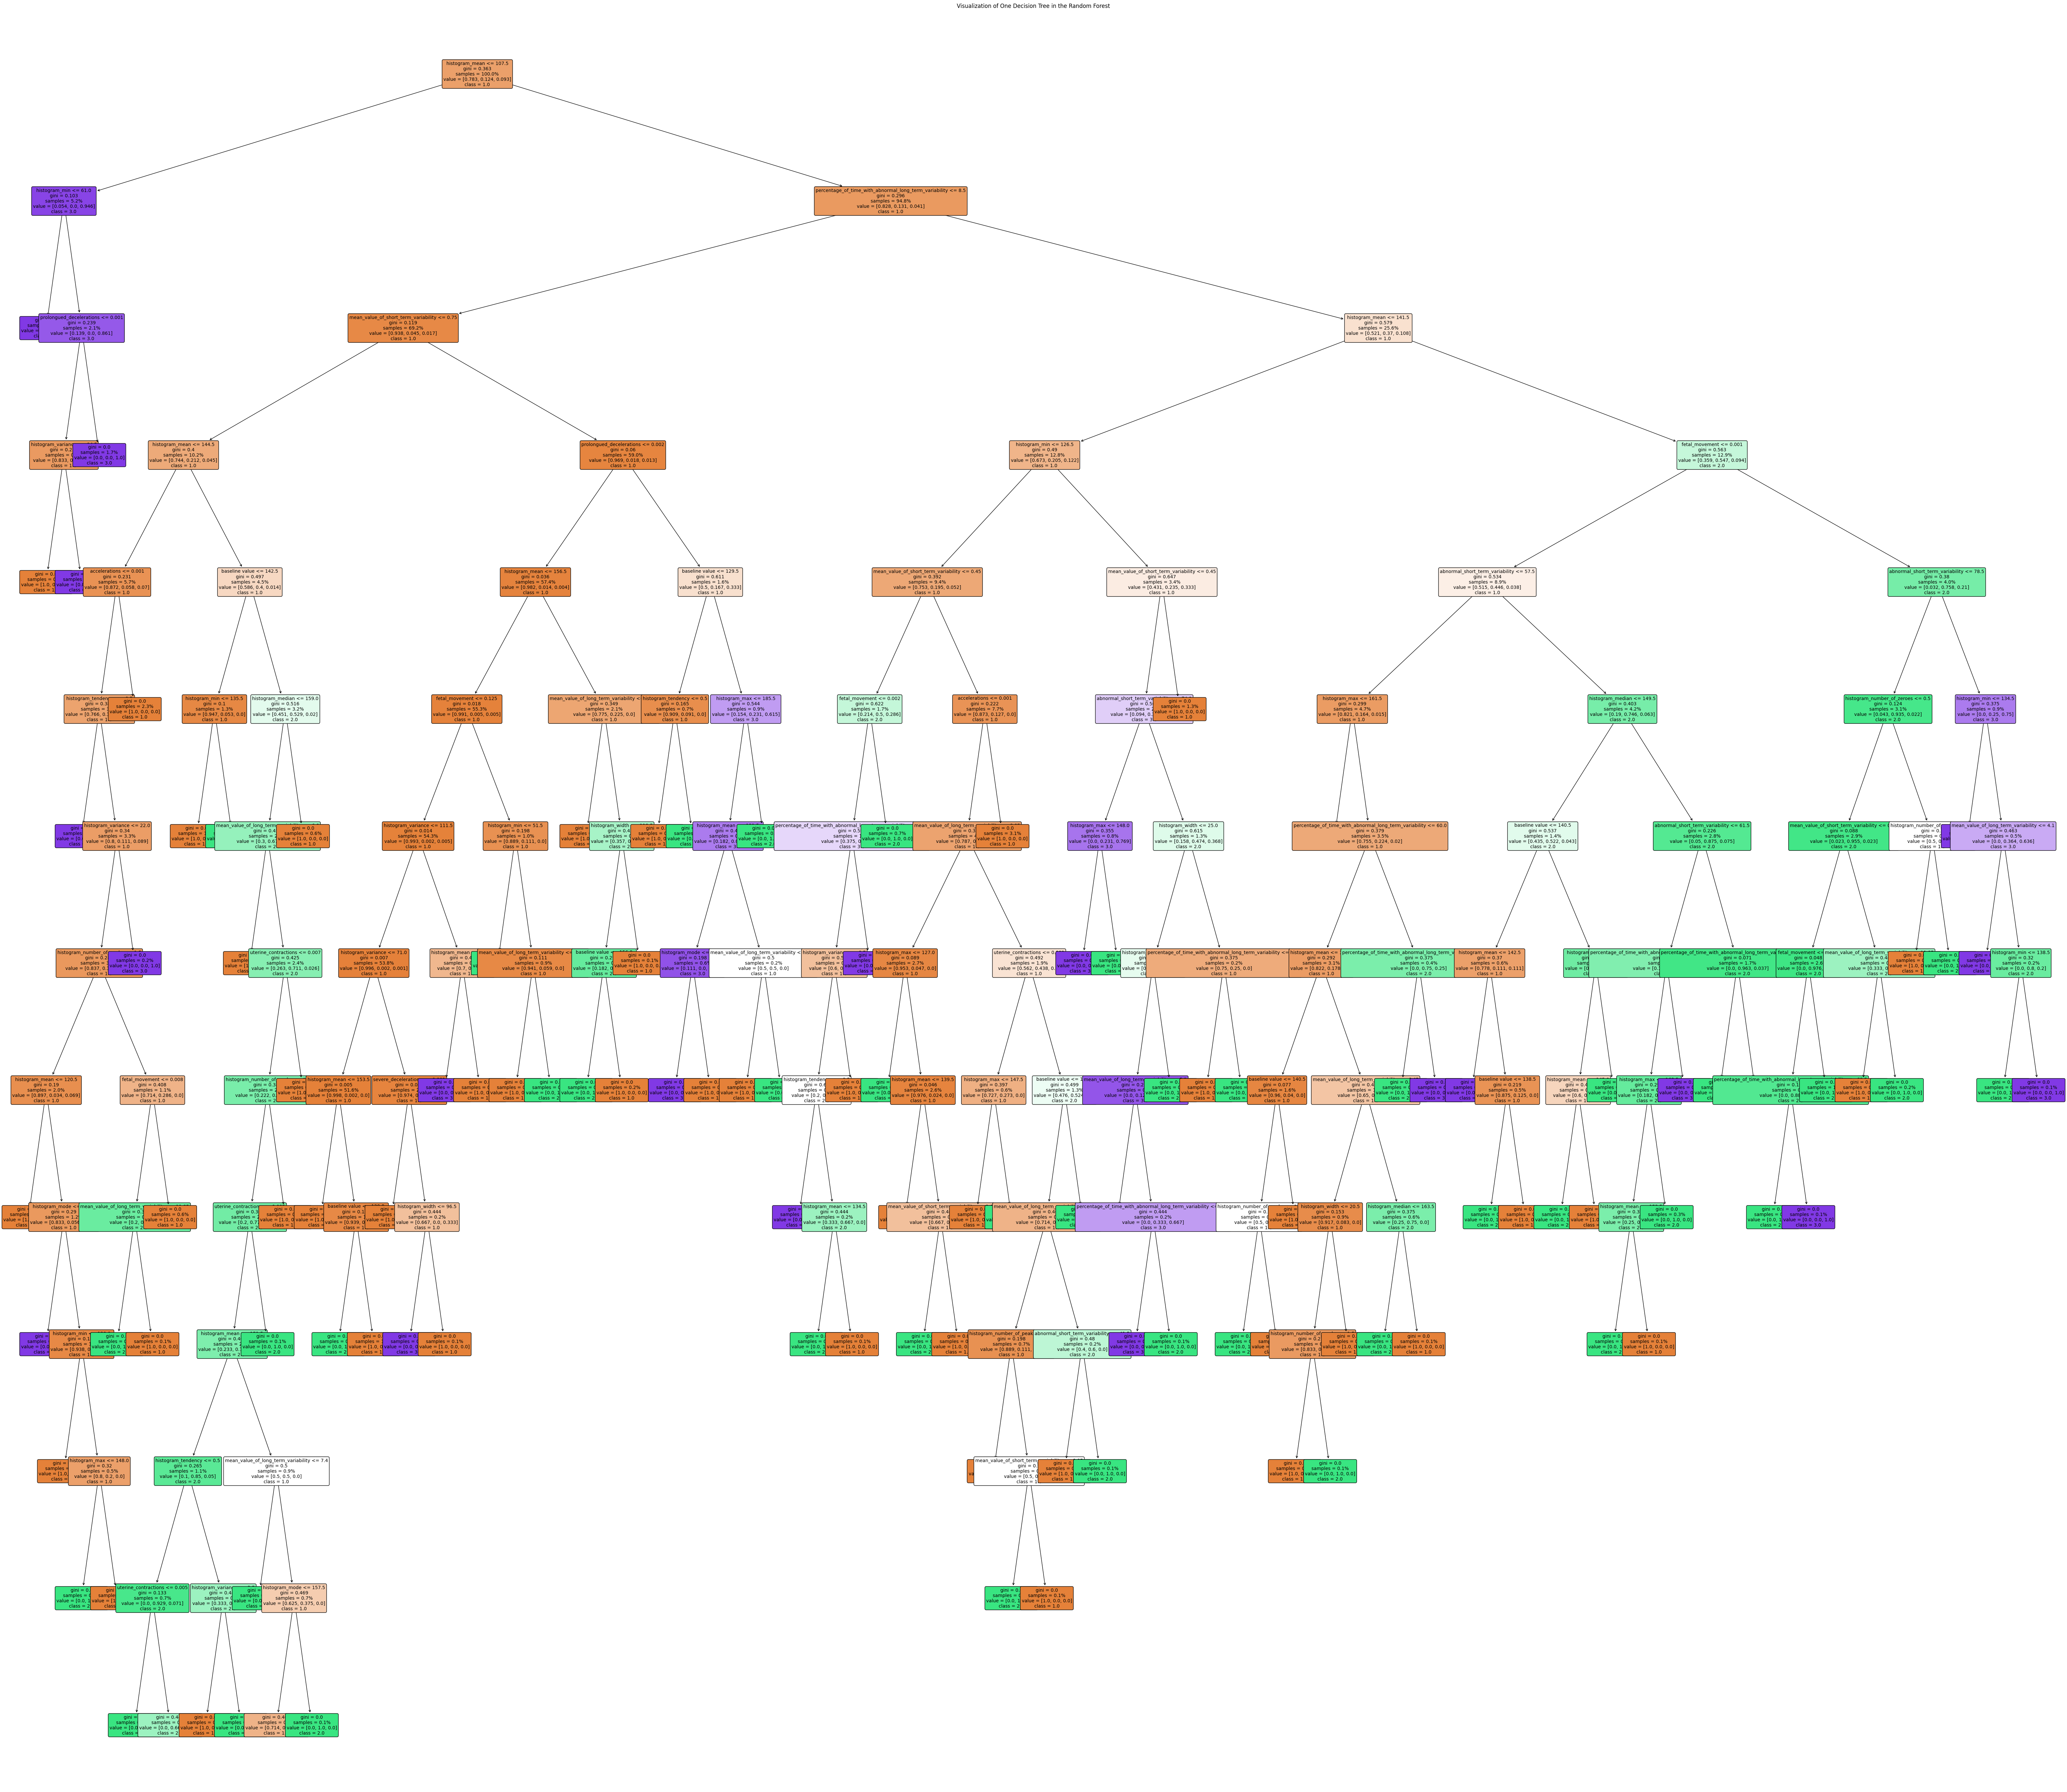

In [15]:
plt.figure(figsize=(80, 70))  
plot_tree(
    clf_forest.estimators_[0], 
    feature_names=xtrain.columns, 
    class_names=[str(cls) for cls in set(ytrain)],  
    filled=True,  
    rounded=True,
    fontsize=10, 
    proportion=True 
)
plt.title("Visualization of One Decision Tree in the Random Forest")
plt.show()
